#### CSC 180 Intelligent Systems 

#### William Lorence, Ajaydeep Singh, Romin Akoliya, Abdurraziq Paikur

#### California State University, Sacramento

# Project 3: House Price Prediction using TensorFlow Functional API
### Creating the data table

In [2]:
metadata_path = "./dataset/HousesInfo.txt"

In [3]:
import os
import pandas as pd

import csv
import numpy as np

import cv2
from IPython.display import Image

# Load the metadata file into a DataFrame
df = pd.read_csv(metadata_path, sep=" ", header=None, 
                 names=['bedrooms', 'bathrooms', 'area', 'zipcode', 'price'])

# Display the first few rows to verify the data is loaded correctly
print(df.shape)
df.head()


(535, 5)


,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226


### Removing outliers (10 pts)

In [4]:
# Filter houses with prices between 100K and 900K
df_filtered = df[(df['price'] >= 100000) & (df['price'] <= 900000)]

#Removes the one house with zipcode 3XXXX
df_filtered = df_filtered[(df['zipcode'] >= 40000)]

#Removes houses with more than 5 bathrooms
df_filtered = df_filtered[(df['bathrooms'] <= 5)]

#Removes houses with more than 5 bedrooms
df_filtered = df_filtered[(df['bedrooms'] <= 5)]

print(df_filtered.shape)
df_filtered.head()

#143 houses removed


(392, 5)


C:\Users\legow\AppData\Local\Temp\ipykernel_5548\26002699.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(df['zipcode'] >= 40000)]
C:\Users\legow\AppData\Local\Temp\ipykernel_5548\26002699.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(df['bathrooms'] <= 5)]
C:\Users\legow\AppData\Local\Temp\ipykernel_5548\26002699.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(df['bedrooms'] <= 5)]


,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
2,3,4.0,3923,85266,889000
6,3,4.0,2544,85262,799000
10,5,5.0,4829,85266,519200
12,5,3.0,5462,85266,799000


### Handling the images dataset

In [5]:
print(df_filtered.index)

Index([  0,   2,   6,  10,  12,  13,  14,  15,  16,  17,
       ...
       525, 526, 527, 528, 529, 530, 531, 532, 533, 534],
      dtype='int64', length=392)


In [6]:
image_folder = "./dataset"

## Bathroom.jpg
bathroom_images = []
for index in df_filtered.index:
    if os.path.isfile("./dataset/" + str(index+1) + "_bathroom.jpg"):
        bathroom_images.append("./dataset/" + str(index+1) + "_bathroom.jpg")
img=pd.DataFrame(bathroom_images,columns=['bathroom_img'])

## Bedroom.jpg
bedroom_images = []
for index in df_filtered.index:
    if os.path.isfile("./dataset/" + str(index+1) + "_bedroom.jpg"):
        bedroom_images.append("./dataset/" + str(index+1) + "_bedroom.jpg")
img['bedroom_img']=bedroom_images

## Frontal.jpg
frontal_images = []
for index in df_filtered.index:
    if os.path.isfile("./dataset/" + str(index+1) + "_frontal.jpg"):
        frontal_images.append("./dataset/" + str(index+1) + "_frontal.jpg")
img['frontal_img']=frontal_images

## Kitchen.jpg
kitchen_images = []
for index in df_filtered.index:
    if os.path.isfile("./dataset/" + str(index+1) + "_kitchen.jpg"):
        kitchen_images.append("./dataset/" + str(index+1) + "_kitchen.jpg")
img['kitchen_img']=kitchen_images

print(img.shape)
img.head()

(392, 4)


,bathroom_img,bedroom_img,frontal_img,kitchen_img
0,./dataset/1_bathroom.jpg,./dataset/1_bedroom.jpg,./dataset/1_frontal.jpg,./dataset/1_kitchen.jpg
1,./dataset/3_bathroom.jpg,./dataset/3_bedroom.jpg,./dataset/3_frontal.jpg,./dataset/3_kitchen.jpg
2,./dataset/7_bathroom.jpg,./dataset/7_bedroom.jpg,./dataset/7_frontal.jpg,./dataset/7_kitchen.jpg
3,./dataset/11_bathroom.jpg,./dataset/11_bedroom.jpg,./dataset/11_frontal.jpg,./dataset/11_kitchen.jpg
4,./dataset/13_bathroom.jpg,./dataset/13_bedroom.jpg,./dataset/13_frontal.jpg,./dataset/13_kitchen.jpg


### Concatenate the images into one image for each house

In [7]:
images_output=[]
for row_index,row in img.iterrows():
            inputImages=[]
            outputImage = np.zeros((128, 128, 3), dtype="uint8")
            image_temp1 = cv2.imread(row.bathroom_img)
            image1 = cv2.resize(image_temp1, (64 , 64))
            
            image_temp2 = cv2.imread(row.bedroom_img)
            image2 = cv2.resize(image_temp2, (64 , 64))
            
            image_temp3 = cv2.imread(row.frontal_img)
            image3 = cv2.resize(image_temp3, (64 , 64))
            
            image_temp4 = cv2.imread(row.kitchen_img)
            image4 = cv2.resize(image_temp4, (64 , 64))
              
            inputImages.append(image1)
            inputImages.append(image2)
            inputImages.append(image3)
            inputImages.append(image4)
            
            outputImage[0:64, 0:64] = inputImages[0]
            outputImage[0:64, 64:128] = inputImages[1]
            outputImage[64:128, 64:128] = inputImages[2]
            outputImage[64:128, 0:64] = inputImages[3]
            
        
            images_output.append(outputImage)
print(len(images_output))

392


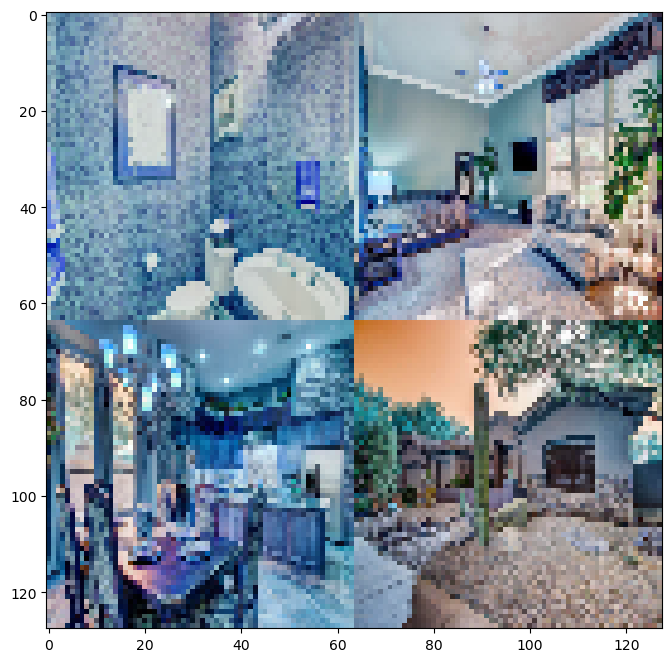

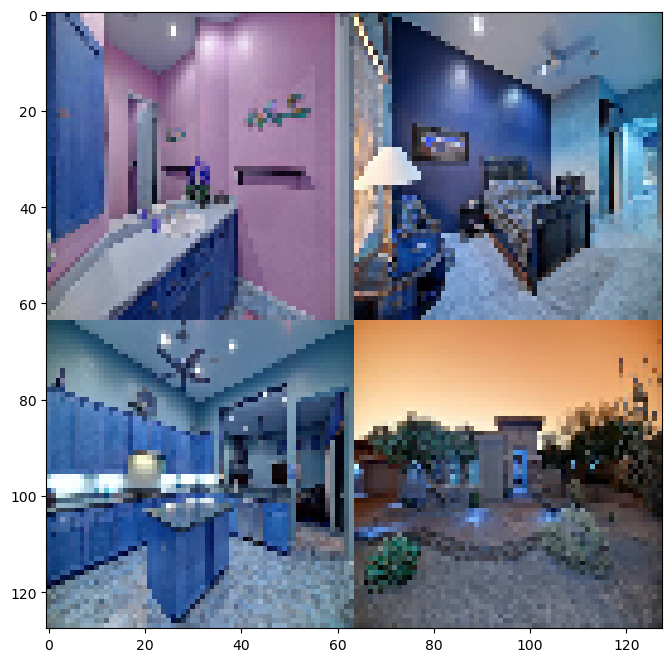

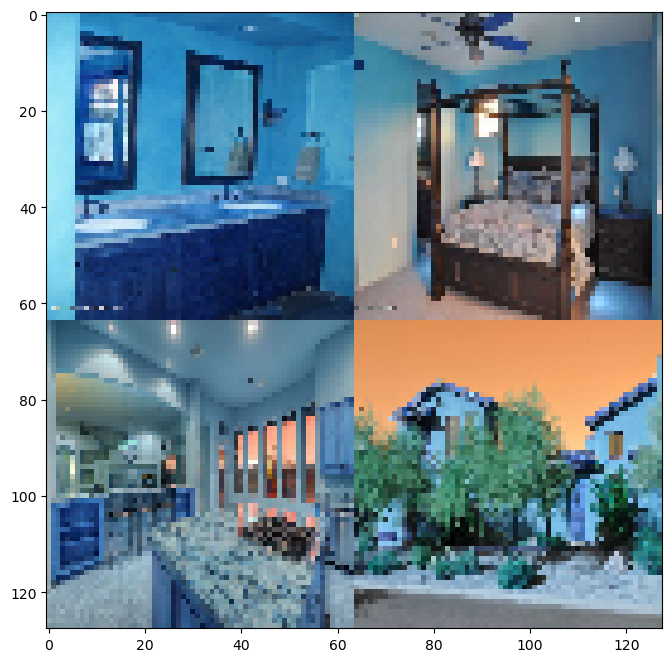

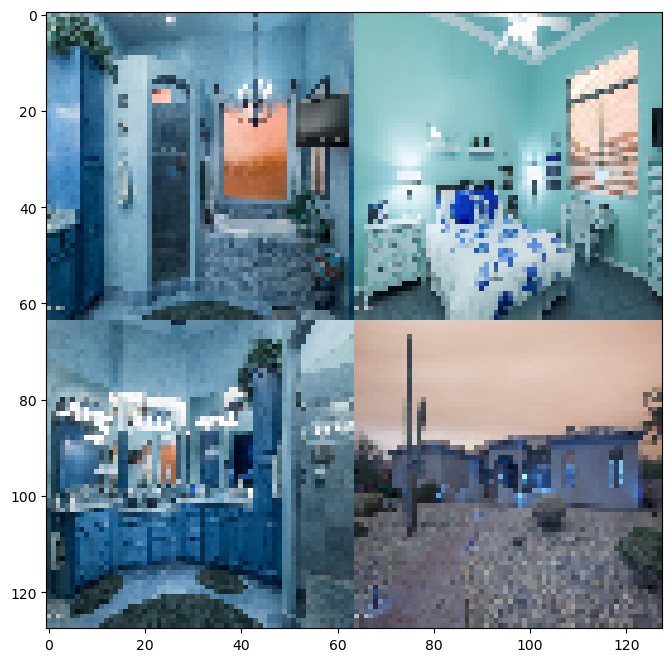

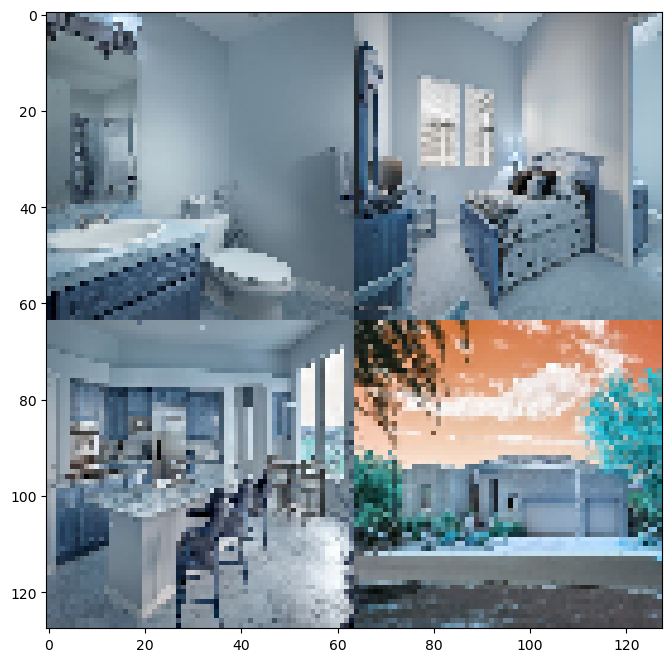

In [8]:
import matplotlib.pyplot as plt

#Prints the first 5 concatenated images as a test
c = 0
for i in images_output:
     if c < 5:
          plt.figure(figsize=(8,8))
          plt.imshow(i, interpolation='nearest')
          plt.show()
          c += 1

### Create numpy array of images

In [9]:
img_arr=np.asarray(images_output)
img_arr.shape

(392, 128, 128, 3)

### Encode Categorical Features and Normalize Numeric Features (10 pts)

In [10]:
#Apply normalization to the numerical columns
z_columns = ['bedrooms', 'bathrooms', 'area']

from scipy.stats import zscore

def z_score_numerical(df, names):
    for name in names:
        z_col = zscore(df[name])
        
        for index in df.index:
            new_value = z_col[index]
            df.loc[index, name] = new_value
        
z_score_numerical(df_filtered, z_columns)

df_filtered.head()

C:\Users\legow\AppData\Local\Temp\ipykernel_5548\3767928901.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7309293088493242' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, name] = new_value
C:\Users\legow\AppData\Local\Temp\ipykernel_5548\3767928901.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.62354490646019' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, name] = new_value


,bedrooms,bathrooms,area,zipcode,price
0,0.730929,1.843249,1.623545,85255,869500
2,-0.322469,1.843249,1.507104,85266,889000
6,-0.322469,1.843249,0.271930,85262,799000
10,1.784327,3.075749,2.318610,85266,519200
12,1.784327,0.610748,2.885589,85266,799000


In [11]:
import math

def first_two_digits(num):
    return num // 10 ** (int(math.log(num, 10)) - 1)

#Shorten zipcode to the first digit (general area of the U.S.)
zipcode_first_digit = df_filtered['zipcode'].apply(first_two_digits)

for index in df_filtered.index:
    new_value = zipcode_first_digit[index]
    df_filtered.loc[index, 'zipcode'] = new_value

df_filtered.head()


,bedrooms,bathrooms,area,zipcode,price
0,0.730929,1.843249,1.623545,85,869500
2,-0.322469,1.843249,1.507104,85,889000
6,-0.322469,1.843249,0.271930,85,799000
10,1.784327,3.075749,2.318610,85,519200
12,1.784327,0.610748,2.885589,85,799000


In [12]:
hot_encode_columns = ['zipcode']

def encode_text_dummy_loop(df, names):
    for name in names:
        dummies = pd.get_dummies(df[name])
        for x in dummies.columns:
            dummy_name = "{}-{}".format(name, x)
            df[dummy_name] = dummies[x]
        df.drop(name, axis=1, inplace=True)

encode_text_dummy_loop(df_filtered, hot_encode_columns)

df_filtered.head()

,bedrooms,bathrooms,area,price,zipcode-60,zipcode-62,zipcode-81,zipcode-85,zipcode-91,zipcode-92,zipcode-93,zipcode-94,zipcode-95,zipcode-96,zipcode-98
0,0.730929,1.843249,1.623545,869500,False,False,False,True,False,False,False,False,False,False,False
2,-0.322469,1.843249,1.507104,889000,False,False,False,True,False,False,False,False,False,False,False
6,-0.322469,1.843249,0.271930,799000,False,False,False,True,False,False,False,False,False,False,False
10,1.784327,3.075749,2.318610,519200,False,False,False,True,False,False,False,False,False,False,False
12,1.784327,0.610748,2.885589,799000,False,False,False,True,False,False,False,False,False,False,False


In [13]:
# Apply the transformation to the dataset
X_img = img_arr
X_data = df_filtered.drop('price', axis=1)

y_data = df_filtered['price']

### Split Data for Training and Testing (5 pts)

In [14]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_img_train, X_img_test, X_data_train, X_data_test, y_train, y_test = train_test_split(X_img, X_data, y_data, test_size=0.2, random_state=8)

# Display the shape of the resulting datasets
print(f"X_data_train shape: {X_data_train.shape}, X_data_test shape: {X_data_test.shape}")

print(f"X_img_train shape: {X_img_train.shape}, X_img_test shape: {X_img_test.shape}")

print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_data_train shape: (313, 14), X_data_test shape: (79, 14)
X_img_train shape: (313, 128, 128, 3), X_img_test shape: (79, 128, 128, 3)
y_train shape: (313,), y_test shape: (79,)


### Extracting visual features using CNN (20 pts) and extracting textual features using Dense layer(s) (20 pts)

In [15]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate

# first input model (CNN with images)
visible1 = Input(shape=(128,128,3,))
conv11 = Conv2D(128, kernel_size=3, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(64, kernel_size=3, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
conv13 = Conv2D(128, kernel_size=3, activation='relu')(pool12)
pool13 = MaxPooling2D(pool_size=(2, 2))(conv13)
flat1 = Flatten()(pool13)

# second input model (FCNN with metadata)
visible2 = Input(shape=(14,))
hidden1 = Dense(128, activation='relu')(visible2)
hidden2 = Dense(64, activation='relu')(hidden1)

# merge input models
merge = concatenate([flat1, hidden2])

# interpretation model
hidden3 = Dense(128, activation='relu')(merge)
hidden4 = Dense(64, activation='relu')(hidden3)
output = Dense(1)(hidden4)

# model creation
model = Model(inputs=[visible1, visible2], outputs=output)

# summarize layers
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │      3,584 │ input_layer[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │     73,792 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 30, 30,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      1,920 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 25088)     │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 25152)     │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │  3,219,584 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         65 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,389,313 (12.93 MB)

 Trainable params: 3,389,313 (12.93 MB)

 Non-trainable params: 0 (0.00 B)

None


### Use EarlyStopping (10 pts)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=2, restore_best_weights=True)
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

history = model.fit([X_img_train, X_data_train], y_train, 
                    validation_data=([X_img_test, X_data_test], y_test),
                    epochs=100,
                    callbacks=[early_stopping])


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 538122387456.0000 - val_loss: 277519466496.0000
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 284897574912.0000 - val_loss: 276476592128.0000
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 257852620800.0000 - val_loss: 202648731648.0000
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 221737123840.0000 - val_loss: 49333841920.0000
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 97697955840.0000 - val_loss: 35043536896.0000
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 59925241856.0000 - val_loss: 33789237248.0000
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 48445558784.0000 - val_loss: 35064737792.0000
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 47264911360.0000 - val_loss: 32835436544.0000
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 45134262272.0000 - val_loss: 32317609984.0000
Epoch 10/100
10/10 ━━━━━━━━━━━

### Print out RMSE and lift chart data (10 pts)

In [17]:
test_loss = model.evaluate([X_img_test, X_data_test], y_test)
print(f"Test Loss (MSE): {test_loss}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13978542080.0000
Test Loss (MSE): 16061364224.0


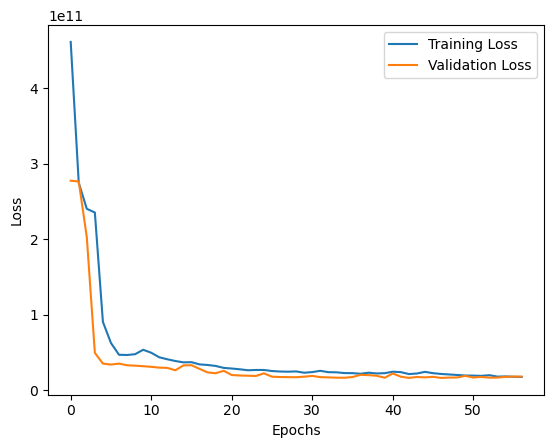

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the test set
y_pred = model.predict([X_img_test, X_data_test])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Root Mean Square Error (RMSE): 126733.43926678141
[579874.06 509031.78 623712.56 672638.2  255849.56 480728.6  422600.9
 547639.94 719747.44 144601.75 676337.8  575114.06 583407.3  618785.8
 287319.5  472540.9  430169.53 500373.72 228836.47 614760.25 309408.03
 380285.97 590892.7  532249.2  388389.72 484903.38 227984.75 486391.97
 282698.1  600500.7  390699.66 344795.56 303627.72 705038.4  402354.97
 510182.66 506396.25 568433.56 454721.16 417138.34 491863.28 159016.77
 624075.3  618718.2  650721.06 432440.56 522340.4  553259.06 190689.88
 142343.53 407642.94 400118.16 649713.7  475280.28 474538.1  632978.9
 216796.12 556496.9  507682.34 701230.2  461539.16 539886.7  506283.78
 457287.03 434933.1  589146.8  480441.72 538639.5  209536.7  545110.7
 499200.34 661565.44 427872.3  385789.16 579465.06 220928.44 507802.34
 447752.28 631227.56]


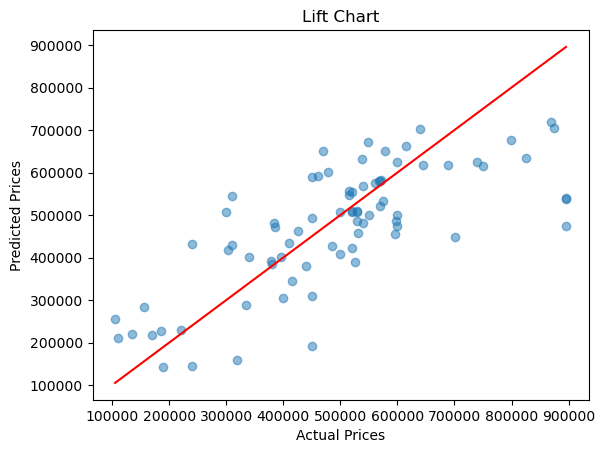

In [20]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Lift Chart')
plt.show()


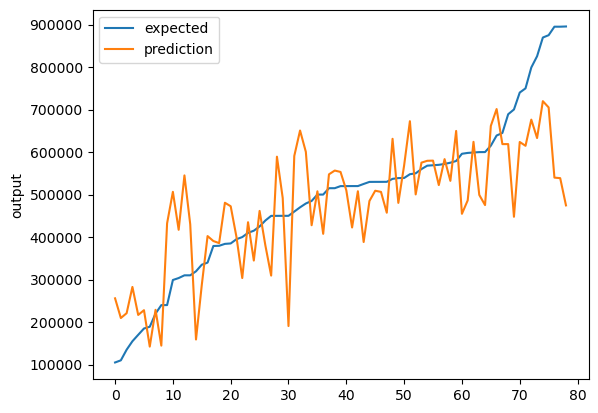

In [27]:
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

chart_regression(y_pred.flatten(), y_test, sort=True)